In [68]:
#fashion shop data

In [69]:
import pandas as pd
path =r'E:\FINAL_PROJECT_DATA\FashioNet\MAIN_SYSTEM\__data_for_simulation.csv'
df = pd.read_csv(path, delimiter=",")
df.head(10)

,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
0,9556,D,28,206,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,1,Blouses
1,1065,B,42,103,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,3,Dresses
2,10419,D,28,221,C:\Users\amit hayoun\Desktop\reant_anyway_data...,1,0,3,Blouses
3,9113,D,28,210,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,11,Blouses
4,8978,E,25,209,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,1,Blouses
5,782,B,42,101,C:\Users\amit hayoun\Desktop\reant_anyway_data...,2,0,1,Dresses
6,4523,A,32,115,C:\Users\amit hayoun\Desktop\reant_anyway_data...,3,0,0,Dresses
7,9345,E,25,220,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,0,Blouses
8,2624,C,36,109,C:\Users\amit hayoun\Desktop\reant_anyway_data...,1,0,2,Dresses
9,7308,A,32,417,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Skirts


In [70]:
#user data

In [71]:
user_id = 'A'
data = df.loc[df["UserID"] == user_id]
data.head(5)

,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
6,4523,A,32,115,C:\Users\amit hayoun\Desktop\reant_anyway_data...,3,0,0,Dresses
9,7308,A,32,417,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Skirts
15,225,A,32,117,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,0,Dresses
26,7901,A,32,220,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,3,Blouses
33,4700,A,32,116,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,0,51,Dresses


In [72]:
#View the user's favorite items by category

In [73]:
category = "Dresses"
data = data.loc[data["Class Name"] == category]
data = data.sort_values(by=['Rating'],ascending=False)
data.head(5)

,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
149,4337,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,1,Dresses
100,2423,A,32,113,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Dresses
177,2109,A,32,103,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,31,Dresses
166,923,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,1,Dresses
155,1454,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,3,Dresses


User_id=A
category:Dresses
Favorite items:



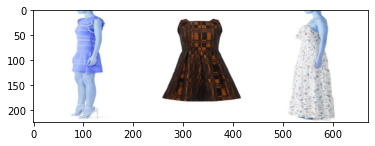

In [74]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random

item_1 = data.iloc[3]['Pic_path']
item_2 = data.iloc[2]['Pic_path']   
item_3 = data.iloc[16]['Pic_path']


im1 = cv2.imread(item_1)
imS1 = cv2.resize(im1, (224, 224))


print(f"User_id={user_id}\ncategory:{category}\nFavorite items:\n")
im2 = cv2.imread(item_2)
imS2 = cv2.resize(im2, (224, 224))

im3 = cv2.imread(item_3)
imS3 = cv2.resize(im3, (224, 224))

numpy_horizontal_concat = np.concatenate((imS1, imS2, imS3), axis=1)
plt.imshow(numpy_horizontal_concat)


In [75]:
#display fashion shop new items data by category


 Sample 5 New items in this category:Dresses



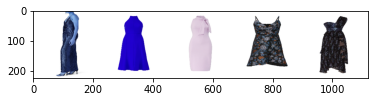

In [76]:
import os

fashion_shop_newItem_data =  r"C:\Users\amit hayoun\Desktop\SHOP_DATA"
category_path = os.path.join(fashion_shop_newItem_data,category)

print(f" Sample 5 New items in this category:{category}\n")
list_dir_category_path = os.listdir(category_path)

im1 = cv2.imread(os.path.join(category_path,list_dir_category_path[0]))
imS1 = cv2.resize(im1, (224, 224))

im2 = cv2.imread(os.path.join(category_path,list_dir_category_path[1]))
imS2 = cv2.resize(im2, (224, 224))

im3 = cv2.imread(os.path.join(category_path,list_dir_category_path[2]))
imS3 = cv2.resize(im3, (224, 224))


im4 = cv2.imread(os.path.join(category_path,list_dir_category_path[9]))
imS4 = cv2.resize(im4, (224, 224))


im5 = cv2.imread(os.path.join(category_path,list_dir_category_path[15]))
imS5 = cv2.resize(im5, (224, 224))

numpy_horizontal_concat = np.concatenate((imS1, imS2, imS3,imS4,imS5), axis=1)
plt.imshow(numpy_horizontal_concat)


In [77]:
##Create a recommendation

###Load FashionModel

In [78]:
import os

from keras import Model
from keras.models import model_from_json
import gc
import cv2
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np


class Recommendation_Model:
    def __init__(self):
        self.model_fashioNet= self.fashionnet_model_loading()
        self.pre_dict = {0: "Blouses_Shirts", 1: "Dresses", 2: "Shorts", 3: "Skirts"}

    def fashionnet_model_loading(self):
        # load json and create model
        json_file = open(r"E:\FINAL_PROJECT_DATA\FashioNet\Models\model.json", 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.model_fashioNet = model_from_json(loaded_model_json)
        # load weights into new model
        self.model_fashioNet.load_weights(r"E:\FINAL_PROJECT_DATA\FashioNet\Models\save_weights.h5")
        print("Loaded FashioNet model from disk")
        self.image_embedding_model = self.get_model_embedding_model()
        return self.model_fashioNet

    def read_image(self,img_path, H=224, W=224):
        img = image.load_img(path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        return img_data

    def get_model_embedding_model(self):
        """
        creating a new model from fashioNet take the 3erd layer for
        image embeddings
        :return: embedding_model
        """
        return Model(inputs=self.model_fashioNet.inputs, outputs=self.model_fashioNet.layers[3].output)

    def get_image_embedding(self,path):
        # process image
        #img_data = self.read_image(path)
        img = image.load_img(path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        ######creating new model from fashionnet layers
        v_feature = self.image_embedding_model.predict(img_data)
        #return feature vector [0:25088] for AnnoyIndex
        feature_vec = v_feature.flatten()
        return feature_vec[0:25088]



In [79]:
## create user class

In [80]:
import pandas as pd


class User:
    def __init__(self, id,csv_data_path):
        self.user_id = id
        self.csv_data_path = csv_data_path
        self.user_data = self.get_user_data()

    def get_user_data(self):
        df = pd.read_csv(self.csv_data_path, delimiter=",")
        data = df.loc[df["UserID"] == self.user_id]
        #print(data.head(20))
        #print(df.columns)
        return data.copy()

    def filter_category(self,category):
        """
        :param category:: list with tow category predicted by the model
        :return: list filter data
        """
        data1 = self.user_data.loc[self.user_data["Class Name"] == category[0]]
        data2 = self.user_data.loc[ self.user_data["Class Name"] == category[1]]
        #print(data1.head(10))
        #print(data2.head(10))
        return [data1,data2]

    def get_top_item_by_user_rating(self,category):
        """
        read from user data, and return most high rating item in this
        category
        :param category: string[Dresses,Shorts,Skirts,Blouses_Shirts]
        :return:tow path to user item
        # """
        # print(category)
        # print(self.user_data.head())
        #print(self.user_data.columns)
        data1 = self.user_data.loc[self.user_data["Class Name"] == category]
        #print(data1.sort_values(by=['Rating'],ascending=False).head(2))
        data1 = data1.sort_values(by=['Rating'],ascending=False)

        try:
            item_1 = data1.iloc[0]['Pic_path']
            item_2 = data1.iloc[1]['Pic_path']
        except IndexError:
            item_2 =item_1
        return [item_1,item_2]



In [81]:
# creating fashion shop

In [115]:
import os
from keras.models import model_from_json
import gc
import cv2
import numpy as np
import random
import pandas as pd
from annoy import AnnoyIndex
import random
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


class fashion_shop:
    def __init__(self, csv_file , user):
        self.pre_dict = {0: "Blouses", 1: "Dresses", 2: "Shorts", 3: "Skirts"}
        self.csv_file_path = csv_file
        self.Dresses_path_dict = {}
        self.Blouses_path_dict = {}
        self.Skirts_path_dict = {}
        self.Shorts_path_dict = {}
        self.fashion_recommendation_model = Recommendation_Model()
        self.user = user
        self.annoy_index = None

    def show_data(self):
        df = pd.read_csv(self.csv_file_path, delimiter=",")
        print(df.columns)
        print(df.sample(30))


    def create_inventory(self,category):
        item_path_dict={}
        # get anny vector at size 25088
        size = 25088
        #size = 802816
        annoy_inventory_1 = self.get_annoy_index(size)
        # get the top tow user items from user by rating
        user_feature_pic = self.user.get_top_item_by_user_rating(category)
        # get feature img from model
        feature_vec_i1 = self.fashion_recommendation_model.get_image_embedding(user_feature_pic[0])
        #feature_vec_i2 = self.fashion_recommendation_model.get_image_embedding(user_feature_pic[1])
        #add
        annoy_inventory_1.add_item(0, feature_vec_i1)
        
        item_path_dict.update({0: user_feature_pic[0]})
        
        #print(self.csv_file_path)
        #print(os.path.join(self.csv_file_path,category))
        category_path = os.path.join(self.csv_file_path,category)
        #print(category_path)
        i = 1
        for pic_name in os.listdir(category_path):
            #print(len(os.listdir(category_path)))
            path = os.path.join(category_path,pic_name)
            feature_vec = self.fashion_recommendation_model.get_image_embedding(path)
            annoy_inventory_1.add_item(i, feature_vec)
            item_path_dict.update({i:path})
            i = i+1
        annoy_inventory_1.build(10)  # 10 trees
        save_name = category +".ann"
        #annot_inventory_1.save('test.ann')
        annoy_inventory_1.save(save_name)
        #self.annoy_index = annoy_inventory_1
        return item_path_dict

    def get_annoy_index(self,size):
        f = size
        t = AnnoyIndex(f, 'angular')  # Length of item vector that will be indexed
        return t

    def print_image(self,item_path_dict,l):

        print(f"Items found for recommendation:\n")


        im2 = cv2.imread(item_path_dict.get(l[1]))
        imS2 = cv2.resize(im2, (224, 224))
        imS2 = cv2.cvtColor(imS2, cv2.COLOR_BGR2RGB)

        im3 = cv2.imread(item_path_dict.get(l[2]))
        imS3 = cv2.resize(im3, (224, 224))
        imS3 = cv2.cvtColor(imS3, cv2.COLOR_BGR2RGB)
        
        im4 = cv2.imread(item_path_dict.get(l[3]))
        imS4 = cv2.resize(im4, (224, 224))
        imS4 = cv2.cvtColor(imS4, cv2.COLOR_BGR2RGB)
        
        numpy_horizontal_concat = np.concatenate((imS2, imS3,imS4), axis=1)
        plt.imshow(numpy_horizontal_concat)
      
    def gen_recommendation_from_inventory(self,item_path_dict,category):
        size = 25088
        #size = 802816
        u = AnnoyIndex(size, 'angular')
       
        save_name = category + ".ann"
        u.load(save_name)  # super fast, will just mmap the file
        #print(u.get_nns_by_item(0, 4))
        print(f"Found 3 items to recommend\n AnnoyIndex{u.get_nns_by_item(0, 4)}")
        # will find the 1000 nearest neighbors
        l = u.get_nns_by_item(0, 4)
        self.print_image(item_path_dict,l)
    
        

    def run_recommendation(self,category):
        #get user data
        u_data = self.user.get_user_data()
        ## model go over all user picture and return 2 category
        print(f"[+][+]Step-1:\n\tFashion recognition model start scanning user data\n")
        path = u_data['Pic_path']
#         category = ['Dresses','Skirts']
        #print(f"\tUser's favorite items for category: {category}\n")        
        print(f"[+][+]Step-2:\n\tcreate fashion shop inventory for category: {category}"
              f"\n\tUsing AnnoyIndex\n")
        # get user item pic_path list, and subtract from general data , to create inventory
        item_path_dict1 = self.create_inventory(category)
        
        print(f"[+][+]Step-3:\n\ttgen_recommendation_from_inventory for category {category}\n")
        self.gen_recommendation_from_inventory(item_path_dict1 ,category)
       




In [116]:
users_data_path =r'E:\FINAL_PROJECT_DATA\FashioNet\MAIN_SYSTEM\__data_for_simulation.csv'
df = pd.read_csv(users_data_path, delimiter=",")
user_id = 'A'
data = df.loc[df["UserID"] == user_id]
category = "Dresses"
data = data.loc[data["Class Name"] == category]
data = data.sort_values(by=['Rating'],ascending=False)
data.head(5)


,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
149,4337,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,1,Dresses
100,2423,A,32,113,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Dresses
177,2109,A,32,103,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,31,Dresses
166,923,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,1,Dresses
155,1454,A,32,112,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,3,Dresses


In [117]:
##show User's Favorite item in category:'Dresses'

	Favorite item in category:: Dresses

User_id=A
category:Dresses
Favorite items:



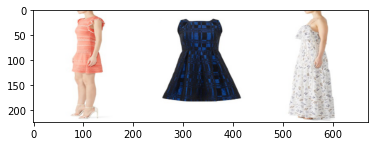

In [118]:
print(f"\tFavorite item in category:: {category}\n")
item_1 = data.iloc[3]['Pic_path']
item_2 = data.iloc[2]['Pic_path']   
item_3 = data.iloc[16]['Pic_path']


im1 = cv2.imread(item_1)
imS1 = cv2.resize(im1, (224, 224))
imS1 = cv2.cvtColor(imS1, cv2.COLOR_BGR2RGB)


print(f"User_id={user_id}\ncategory:{category}\nFavorite items:\n")
im2 = cv2.imread(item_2)
imS2 = cv2.resize(im2, (224, 224))
imS2 = cv2.cvtColor(imS2, cv2.COLOR_BGR2RGB)

im3 = cv2.imread(item_3)
imS3 = cv2.resize(im3, (224, 224))
imS3 = cv2.cvtColor(imS3, cv2.COLOR_BGR2RGB)
numpy_horizontal_concat = np.concatenate((imS1, imS2, imS3), axis=1)
plt.imshow(numpy_horizontal_concat)

In [119]:
##Create a recommendation for user A

Loaded FashioNet model from disk
[+][+]Step-1:
	Fashion recognition model start scanning user data

[+][+]Step-2:
	create fashion shop inventory for category: Dresses
	Using AnnoyIndex

[+][+]Step-3:
	tgen_recommendation_from_inventory for category Dresses

Found 3 items to recommend
 AnnoyIndex[0, 7, 6, 17]
Items found for recommendation:



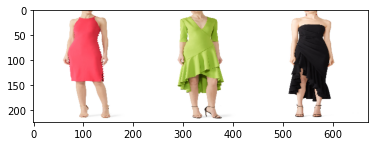

In [120]:
u = User("A",users_data_path)
category = "Dresses"
path = r"C:\Users\amit hayoun\Desktop\SHOP_DATA"
f = fashion_shop(path,u)
f.run_recommendation(category)

In [60]:
####show User's Favorite item in category:'Blouses_Shirts'

In [121]:
user_id = 'A'
data = df.loc[df["UserID"] == user_id]
category = "Blouses"
data = data.loc[data["Class Name"] == category]
data = data.sort_values(by=['Rating'],ascending=False)
data.head(5)


,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
26,7901,A,32,220,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,3,Blouses
43,10126,A,32,218,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Blouses
82,9740,A,32,205,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,2,Blouses
119,9704,A,32,219,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Blouses
175,8861,A,32,202,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Blouses


	Favorite item in category:: Blouses

User_id=A
category:Blouses
Favorite items:



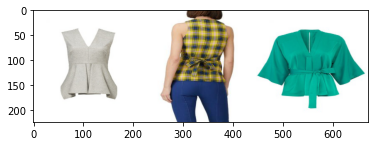

In [125]:
print(f"\tFavorite item in category:: {category}\n")
item_1 = data.iloc[1]['Pic_path']
item_2 = data.iloc[2]['Pic_path']   
item_3 = data.iloc[5]['Pic_path']


im1 = cv2.imread(item_1)
imS1 = cv2.resize(im1, (224, 224))
imS1 = cv2.cvtColor(imS1, cv2.COLOR_BGR2RGB)

print(f"User_id={user_id}\ncategory:{category}\nFavorite items:\n")
im2 = cv2.imread(item_2)
imS2 = cv2.resize(im2, (224, 224))
imS2 = cv2.cvtColor(imS2, cv2.COLOR_BGR2RGB)

im3 = cv2.imread(item_3)
imS3 = cv2.resize(im3, (224, 224))
imS3 = cv2.cvtColor(imS3, cv2.COLOR_BGR2RGB)

numpy_horizontal_concat = np.concatenate((imS1, imS2, imS3), axis=1)
plt.imshow(numpy_horizontal_concat)

In [126]:
##Create a recommendation for user A

Loaded FashioNet model from disk
[+][+]Step-1:
	Fashion recognition model start scanning user data

[+][+]Step-2:
	create fashion shop inventory for category: Blouses
	Using AnnoyIndex

[+][+]Step-3:
	tgen_recommendation_from_inventory for category Blouses

Found 3 items to recommend
 AnnoyIndex[0, 1, 2, 3]
Items found for recommendation:



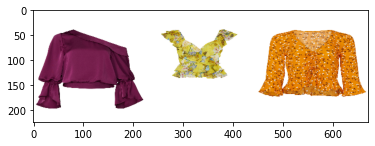

In [127]:
u = User("A",users_data_path)
category = "Blouses"
path = r"C:\Users\amit hayoun\Desktop\SHOP_DATA"
f = fashion_shop(path,u)
f.run_recommendation(category)

In [128]:
# ####show User B Favorite item in category:'Skirts'

In [160]:
user_id ='B'
data = df.loc[df["UserID"] == user_id]
category = 'Skirts'
data = data.loc[data["Class Name"] == category]
data = data.sort_values(by=['Rating'],ascending=False)
data.head(5)


,Unnamed: 0,UserID,Age,Clothing ID,Pic_path,Rating,Recommended IND,Positive Feedback Count,Class Name
61,7340,B,42,413,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Skirts
102,7355,B,42,415,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,0,Skirts
127,6705,B,42,413,C:\Users\amit hayoun\Desktop\reant_anyway_data...,5,1,1,Skirts
107,6921,B,42,415,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,0,Skirts
229,7161,B,42,412,C:\Users\amit hayoun\Desktop\reant_anyway_data...,4,1,0,Skirts


	Favorite item in category:: Skirts

User_id=B
category:Skirts
Favorite items:



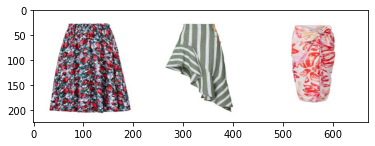

In [161]:
print(f"\tFavorite item in category:: {category}\n")
item_1 = data.iloc[1]['Pic_path']
item_2 = data.iloc[2]['Pic_path']   
item_3 = data.iloc[4]['Pic_path']

im1 = cv2.imread(item_1)
imS1 = cv2.resize(im1, (224, 224))
imS1 = cv2.cvtColor(imS1, cv2.COLOR_BGR2RGB)


im2 = cv2.imread(item_2)
imS2 = cv2.resize(im2, (224, 224))
imS2 = cv2.cvtColor(imS2, cv2.COLOR_BGR2RGB)

im3 = cv2.imread(item_3)
imS3 = cv2.resize(im3, (224, 224))
imS3 = cv2.cvtColor(imS3, cv2.COLOR_BGR2RGB)

print(f"User_id={user_id}\ncategory:{category}\nFavorite items:\n")

numpy_horizontal_concat = np.concatenate((imS1,imS2,imS3), axis=1)
plt.imshow(numpy_horizontal_concat)

In [158]:
## Create a recommendation for user B  category Skirts

Loaded FashioNet model from disk
[+][+]Step-1:
	Fashion recognition model start scanning user data

[+][+]Step-2:
	create fashion shop inventory for category: Skirts
	Using AnnoyIndex

[+][+]Step-3:
	tgen_recommendation_from_inventory for category Skirts

Found 3 items to recommend
 AnnoyIndex[0, 5, 8, 9]
Items found for recommendation:



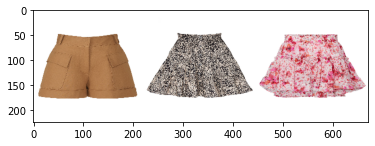

In [159]:
u = User("B",users_data_path)
category = "Skirts"
path = r"C:\Users\amit hayoun\Desktop\SHOP_DATA"
f = fashion_shop(path,u)
f.run_recommendation(category)